In [2]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

from Tools import diff
from Tools import ind_VfoldCross
from Tools import RandomForestClassification
from Tools import plot_confusion_matrix
from Tools import resultsClassification

In [27]:
# Load the data from .mat format:
Image = sio.loadmat("/data/shared/Big-Geodata-Processing-2021-1A/distributed_computing_machine_learning/Data/HSI/Pavia.mat")

In [28]:
# Split Data and Labels:
X_total = Image.get('Xtotal')
Y_total = Image.get('Ytotal')

In [64]:
# Reshape the data from data cube to 2-D matrix:
X_total = X_total.reshape((400*400, 40))
Y_total = Y_total.reshape((400*400, 1))
# print(X_total)
# print(Y_total)

# Select all the pixels with class(class = 0 is non-classifier):
X = X_total[np.where(Y_total != 0)[0],:]
Y = Y_total[np.where(Y_total != 0)[0]]
# print(X)
# print(Y)

# Select random the training samples per class: (we have to balance the classes)
list_of_train = ind_VfoldCross(Y, 100)
# print(list_of_train)

# Select training and testing data:
X_train = X[list_of_train,:]
Y_train = Y[list_of_train]
Y_train = [Y_train[t][0] for t in range(0,len(Y_train))]
Y_train = np.array(Y_train)
# print(X_train)
# print(Y_train)


list_of_test = diff(range(len(X)), list_of_train)
X_test = X[list_of_test,:]
Y_test = Y[list_of_test]
Y_test = [Y_test[t][0] for t in range(0,len(Y_test))]
Y_test = np.array(Y_test)
#print(list_of_test)


# Apply RF using cross-validation to tune (fix) the parameters:
target_names = ['Water', 'Trees', 'Asphalt', 'Bricks', 'Bitumen', 'Tiles', 'Shadows', 'Meadows', 'Bare Soil']
RES = RandomForestClassification(X_train,Y_train,X_test, Y_test, 200, 1, target_names)
print("The Overall Classification Accuracy is " + str(RES[1]))

print('''

''' + str(RES[4]))

The Overall Classification Accuracy is 0.9678221442152991


              precision    recall  f1-score   support

       Water       1.00      1.00      1.00      4181
       Trees       1.00      0.93      0.96      2324
     Asphalt       0.99      0.98      0.98      2137
      Bricks       0.98      0.96      0.97      1599
     Bitumen       0.96      0.91      0.94      1375
       Tiles       0.91      0.99      0.95      1145
     Shadows       0.93      0.96      0.95       585
     Meadows       0.65      0.96      0.77       187
   Bare Soil       0.64      1.00      0.78       141

    accuracy                           0.97     13674
   macro avg       0.90      0.97      0.92     13674
weighted avg       0.97      0.97      0.97     13674



Confusion matrix
[[4181    0    0    0    0    0    0    0    0]
 [   0 2190    0    0    0   67    0    0   67]
 [   0    0 2035   27   41    0   34    0    0]
 [   0    2    4 1550    1    2   21   17    2]
 [   0    0   28    8 1254   14    2   69    0]
 [   0   10    0    0    6 1129    0    0    0]
 [   0    0    0   21    0    0  561    3    0]
 [   0    0    0    2    1    0    4  180    0]
 [   0    1    0    0    0    0    0    0  140]]


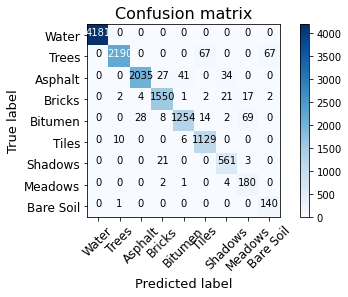

In [60]:
# Plot the confusion matrix:
fig = plt.figure(1)
plot_confusion_matrix(RES[3], 
                      target_names,
                      normalize = False, 
                      title = 'Confusion matrix', 
                      cmap = plt.cm.Blues)

plt.show()

In [61]:
# Uncomment if you want to save the figure
fig.savefig('Pavia_RF_confusion.jpg', 
            format = 'jpg', 
            dpi = 150)

plt.close('all')

In [62]:
# Save the results and the classifier:
Rootoutput = '.'
resultsClassification(RES, Rootoutput, '', 'ResultsRF',target_names , X_train.shape[1], -1, -1)

saved cl_Final


/tmp/ipykernel_228/2540908540.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['Non-class'] + target_names)
/tmp/ipykernel_228/2540908540.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(target_names)
/tmp/ipykernel_228/2540908540.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['Non-class'] + target_names)


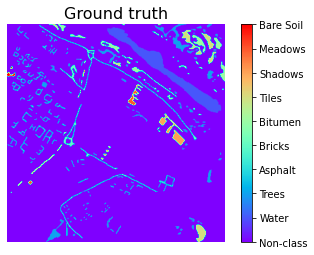

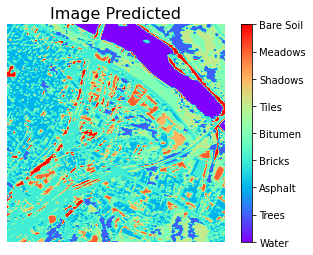

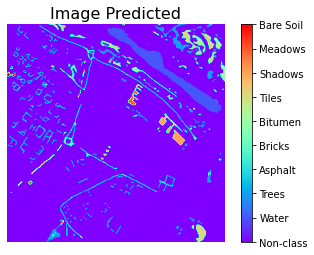

In [65]:
# Classify ALL the image:
Y_pred = RES[0].predict(X_total)

# Ground truth and classification maps visualization:
Y_total = Y_total.reshape((400,400))
plt.figure(2)
img = plt.imshow(Y_total)
img.set_cmap('rainbow')
plt.title('Ground truth',fontsize = 16)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(['Non-class'] + target_names)
plt.axis('off')

Y_pred = Y_pred.reshape((400,400))
plt.figure(3)
img = plt.imshow(Y_pred)
img.set_cmap('rainbow')
plt.title('Image Predicted',fontsize = 16)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(target_names)
plt.axis('off')

Y_pred[Y_total == 0] = 0
Y_pred = Y_pred.reshape((400,400))
plt.figure(4)
img = plt.imshow(Y_pred)
img.set_cmap('rainbow')
plt.title('Image Predicted',fontsize = 16)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(['Non-class'] + target_names)
plt.axis('off')
plt.show()